In [1]:
%matplotlib inline


# The Lifecycle of a Plot


This tutorial aims to show the beginning, middle, and end of a single
visualization using Matplotlib. We'll begin with some raw data and
end by saving a figure of a customized visualization. Along the way we'll try
to highlight some neat features and best-practices using Matplotlib.

.. currentmodule:: matplotlib

<div class="alert alert-info"><h4>Note</h4><p>This tutorial is based off of
    `this excellent blog post <http://pbpython.com/effective-matplotlib.html>`_
    by Chris Moffitt. It was transformed into this tutorial by Chris Holdgraf.</p></div>

A note on the Object-Oriented API vs Pyplot
===========================================

Matplotlib has two interfaces. The first is an object-oriented (OO)
interface. In this case, we utilize an instance of :class:`axes.Axes`
in order to render visualizations on an instance of :class:`figure.Figure`.

The second is based on MATLAB and uses a state-based interface. This is
encapsulated in the :mod:`pyplot` module. See the :doc:`pyplot tutorials
</tutorials/introductory/pyplot>` for a more in-depth look at the pyplot
interface.

Most of the terms are straightforward but the main thing to remember
is that:

* The Figure is the final image that may contain 1 or more Axes.
* The Axes represent an individual plot (don't confuse this with the word
  "axis", which refers to the x/y axis of a plot).

We call methods that do the plotting directly from the Axes, which gives
us much more flexibility and power in customizing our plot.

<div class="alert alert-info"><h4>Note</h4><p>In general, try to use the object-oriented interface over the pyplot
   interface.</p></div>

Our data
========

We'll use the data from the post from which this tutorial was derived.
It contains sales information for a number of companies.



In [2]:
# sphinx_gallery_thumbnail_number = 10
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

data = {'Barton LLC': 109438.50,
        'Frami, Hills and Schmidt': 103569.59,
        'Fritsch, Russel and Anderson': 112214.71,
        'Jerde-Hilpert': 112591.43,
        'Keeling LLC': 100934.30,
        'Koepp Ltd': 103660.54,
        'Kulas Inc': 137351.96,
        'Trantow-Barrows': 123381.38,
        'White-Trantow': 135841.99,
        'Will LLC': 104437.60}
group_data = list(data.values())
group_names = list(data.keys())
group_mean = np.mean(group_data)

Getting started
===============

This data is naturally visualized as a barplot, with one bar per
group. To do this with the object-oriented approach, we'll first generate
an instance of :class:`figure.Figure` and
:class:`axes.Axes`. The Figure is like a canvas, and the Axes
is a part of that canvas on which we will make a particular visualization.

<div class="alert alert-info"><h4>Note</h4><p>Figures can have multiple axes on them. For information on how to do this,
   see the :doc:`Tight Layout tutorial
   </tutorials/intermediate/tight_layout_guide>`.</p></div>



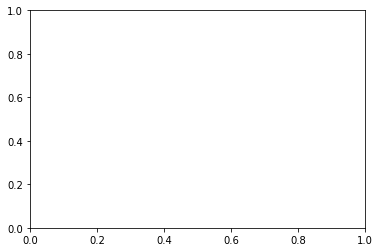

In [3]:
fig, ax = plt.subplots()

Now that we have an Axes instance, we can plot on top of it.



<BarContainer object of 10 artists>

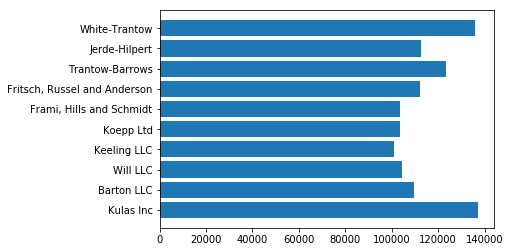

In [4]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)

Controlling the style
=====================

There are many styles available in Matplotlib in order to let you tailor
your visualization to your needs. To see a list of styles, we can use
:mod:`pyplot.style`.



In [7]:
print(plt.style.available)

['seaborn-muted', 'dark_background', 'seaborn-dark', 'grayscale', 'Solarize_Light2', 'fast', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-darkgrid', 'classic', 'seaborn-paper', 'seaborn-ticks', 'bmh', 'seaborn-poster', 'ggplot', 'seaborn', 'seaborn-talk', 'seaborn-white', '_classic_test', 'seaborn-deep', 'fivethirtyeight', 'tableau-colorblind10', 'seaborn-pastel', 'seaborn-whitegrid', 'seaborn-notebook', 'seaborn-colorblind']


You can activate a style with the following:



In [8]:
plt.style.use('fivethirtyeight')

Now let's remake the above plot to see how it looks:



<BarContainer object of 10 artists>

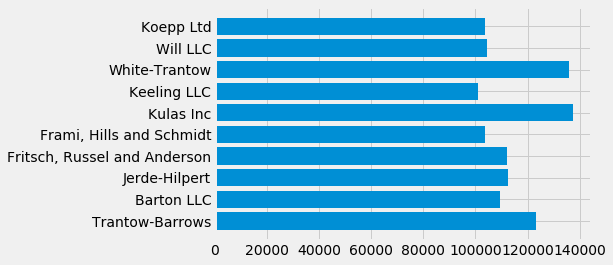

In [9]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)

The style controls many things, such as color, linewidths, backgrounds,
etc.

Customizing the plot
====================

Now we've got a plot with the general look that we want, so let's fine-tune
it so that it's ready for print. First let's rotate the labels on the x-axis
so that they show up more clearly. We can gain access to these labels
with the :meth:`axes.Axes.get_xticklabels` method:



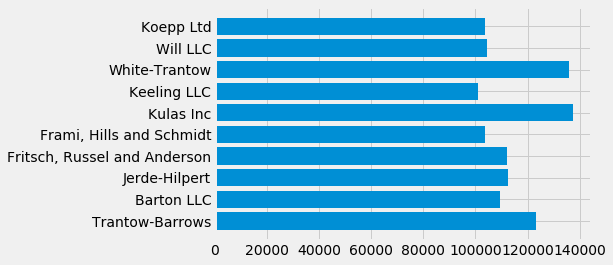

In [10]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()

If we'd like to set the property of many items at once, it's useful to use
the :func:`pyplot.setp` function. This will take a list (or many lists) of
Matplotlib objects, and attempt to set some style element of each one.



[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

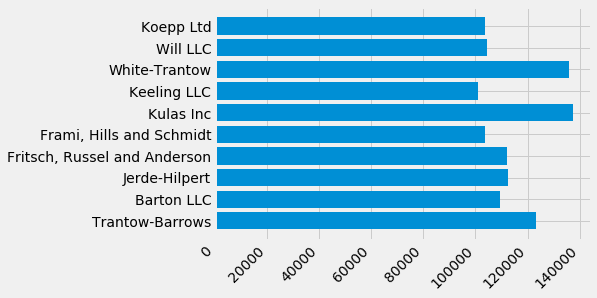

In [11]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

It looks like this cut off some of the labels on the bottom. We can
tell Matplotlib to automatically make room for elements in the figures
that we create. To do this we'll set the ``autolayout`` value of our
rcParams. For more information on controlling the style, layout, and
other features of plots with rcParams, see
:doc:`/tutorials/introductory/customizing`.



[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

D:\software\Anaconda3\envs\py35\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


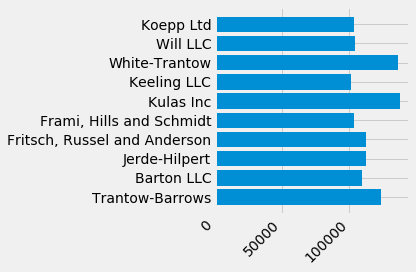

In [12]:
plt.rcParams.update({'figure.autolayout': True})

fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

Next, we'll add labels to the plot. To do this with the OO interface,
we can use the :meth:`axes.Axes.set` method to set properties of this
Axes object.



[Text(0, 0.5, 'Company'),
 (-10000, 140000),
 Text(0.5, 0, 'Total Revenue'),
 Text(0.5, 1.0, 'Company Revenue')]

D:\software\Anaconda3\envs\py35\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


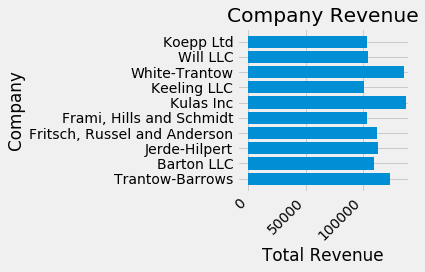

In [13]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue')

We can also adjust the size of this plot using the :func:`pyplot.subplots`
function. We can do this with the ``figsize`` kwarg.

<div class="alert alert-info"><h4>Note</h4><p>While indexing in NumPy follows the form (row, column), the figsize
   kwarg follows the form (width, height). This follows conventions in
   visualization, which unfortunately are different from those of linear
   algebra.</p></div>



[Text(0, 0.5, 'Company'),
 (-10000, 140000),
 Text(0.5, 0, 'Total Revenue'),
 Text(0.5, 1.0, 'Company Revenue')]

D:\software\Anaconda3\envs\py35\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


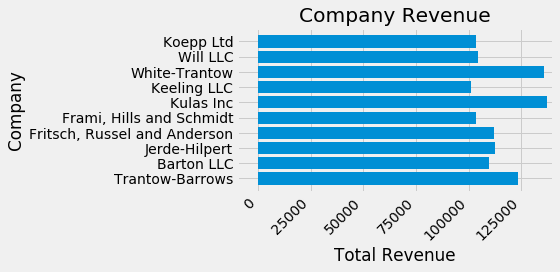

In [14]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue')

For labels, we can specify custom formatting guidelines in the form of
functions by using the :class:`ticker.FuncFormatter` class. Below we'll
define a function that takes an integer as input, and returns a string
as an output.



In [15]:
def currency(x, pos):
    """The two args are the value and tick position"""
    if x >= 1e6:
        s = '${:1.1f}M'.format(x*1e-6)
    else:
        s = '${:1.0f}K'.format(x*1e-3)
    return s

formatter = FuncFormatter(currency)

We can then apply this formatter to the labels on our plot. To do this,
we'll use the ``xaxis`` attribute of our axis. This lets you perform
actions on a specific axis on our plot.



D:\software\Anaconda3\envs\py35\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


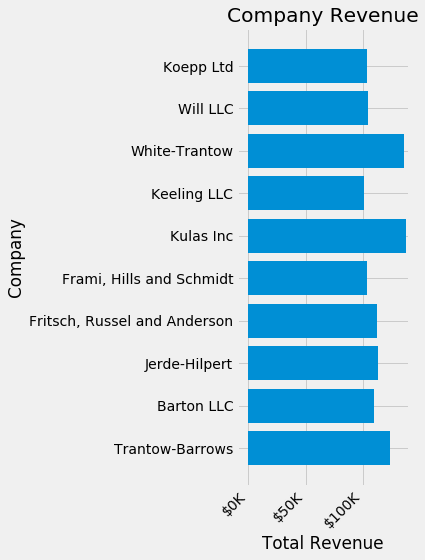

In [16]:
fig, ax = plt.subplots(figsize=(6, 8))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue')
ax.xaxis.set_major_formatter(formatter)

Combining multiple visualizations
=================================

It is possible to draw multiple plot elements on the same instance of
:class:`axes.Axes`. To do this we simply need to call another one of
the plot methods on that axes object.



D:\software\Anaconda3\envs\py35\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


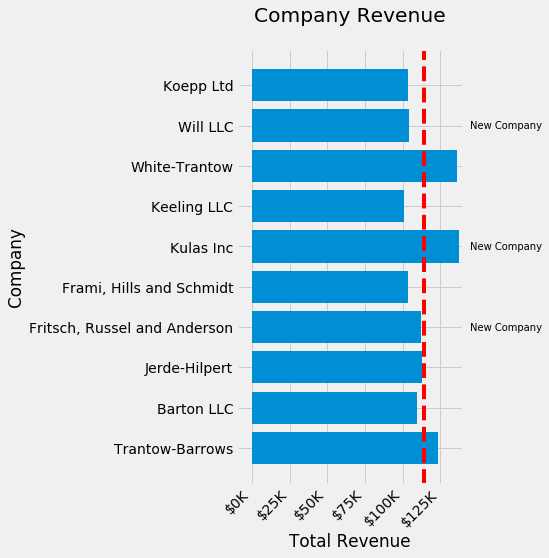

In [17]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

# Add a vertical line, here we set the style in the function call
ax.axvline(group_mean, ls='--', color='r')

# Annotate new companies
for group in [3, 5, 8]:
    ax.text(145000, group, "New Company", fontsize=10,
            verticalalignment="center")

# Now we'll move our title up since it's getting a little cramped
ax.title.set(y=1.05)

ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue')
ax.xaxis.set_major_formatter(formatter)
ax.set_xticks([0, 25e3, 50e3, 75e3, 100e3, 125e3])
fig.subplots_adjust(right=.1)

plt.show()

Saving our plot
===============

Now that we're happy with the outcome of our plot, we want to save it to
disk. There are many file formats we can save to in Matplotlib. To see
a list of available options, use:



In [18]:
print(fig.canvas.get_supported_filetypes())

{'svgz': 'Scalable Vector Graphics', 'png': 'Portable Network Graphics', 'svg': 'Scalable Vector Graphics', 'rgba': 'Raw RGBA bitmap', 'ps': 'Postscript', 'pgf': 'PGF code for LaTeX', 'pdf': 'Portable Document Format', 'raw': 'Raw RGBA bitmap', 'eps': 'Encapsulated Postscript'}


We can then use the :meth:`figure.Figure.savefig` in order to save the figure
to disk. Note that there are several useful flags we'll show below:

* ``transparent=True`` makes the background of the saved figure transparent
  if the format supports it.
* ``dpi=80`` controls the resolution (dots per square inch) of the output.
* ``bbox_inches="tight"`` fits the bounds of the figure to our plot.



In [ ]:
# Uncomment this line to save the figure.
# fig.savefig('sales.png', transparent=False, dpi=80, bbox_inches="tight")

In [ ]:
hhh
hhh